# Digit Recognizer

This notebook uses the sklearn digits dataset that contain 1797 8x8 images of digits ranging from 0 to 9. We will use Random Forest Classifier to classify these images.

## Load digits data from sklearn

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
#data is flatten image
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

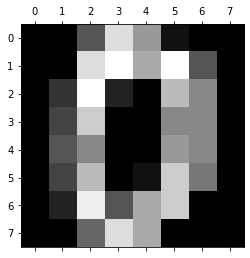

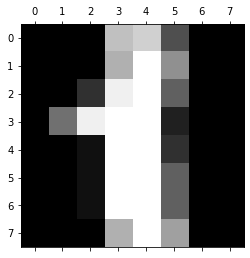

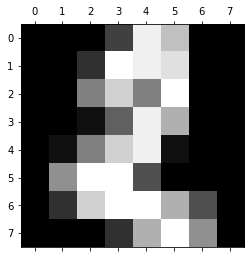

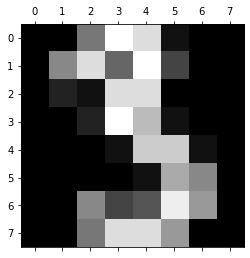

In [5]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

## Converting data to pandas dataframe

In [6]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Since each image is of 8x8 = 64 pixels, we have 64 columns.

In [7]:
# Now we add the output target to the last column
df['target'] = digits.target

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [10]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [12]:
Y_train.shape

(1437,)

## Building Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=85)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=85)

In [32]:
model.score(X_test, Y_test)

0.9777777777777777

<Figure size 432x288 with 0 Axes>

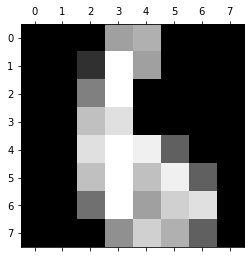

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[88]) 

In [34]:
img = digits.images[88].reshape(1,64)
img = pd.DataFrame(img)

In [35]:
type(img)
img.shape

(1, 64)

In [36]:
pred = model.predict(img)
pred

array([6])

In [37]:
Y_pred = model.predict(X_test)
Y_pred

array([2, 5, 0, 5, 3, 9, 2, 9, 3, 4, 4, 4, 1, 5, 2, 5, 4, 8, 5, 6, 3, 2,
       2, 8, 0, 6, 3, 6, 8, 0, 8, 1, 8, 0, 8, 3, 1, 3, 6, 8, 3, 1, 3, 6,
       4, 6, 4, 0, 5, 9, 2, 4, 5, 8, 4, 7, 2, 5, 2, 0, 1, 0, 6, 4, 9, 1,
       4, 7, 5, 1, 2, 5, 8, 2, 2, 8, 7, 7, 6, 1, 2, 9, 0, 6, 6, 8, 8, 4,
       6, 1, 4, 9, 0, 8, 6, 5, 2, 1, 8, 0, 7, 2, 6, 1, 8, 2, 5, 4, 7, 3,
       6, 7, 0, 4, 2, 5, 1, 2, 6, 8, 5, 3, 2, 8, 4, 5, 4, 5, 8, 5, 5, 7,
       7, 4, 6, 1, 9, 3, 3, 0, 4, 7, 1, 8, 7, 5, 2, 1, 9, 8, 7, 1, 2, 6,
       0, 7, 0, 6, 3, 9, 7, 5, 4, 8, 7, 0, 1, 6, 1, 6, 5, 6, 1, 5, 2, 5,
       0, 5, 2, 9, 0, 4, 0, 1, 8, 2, 3, 6, 5, 5, 6, 6, 9, 8, 3, 5, 9, 1,
       2, 7, 4, 2, 6, 4, 8, 0, 0, 1, 7, 1, 9, 7, 4, 2, 5, 2, 7, 3, 4, 5,
       1, 6, 8, 4, 4, 5, 1, 1, 0, 6, 0, 8, 1, 5, 2, 9, 8, 1, 5, 8, 4, 4,
       9, 7, 3, 9, 2, 9, 2, 7, 6, 0, 7, 3, 2, 3, 9, 2, 1, 2, 3, 1, 8, 1,
       1, 2, 7, 5, 3, 0, 9, 5, 8, 1, 7, 6, 9, 5, 5, 8, 8, 5, 1, 3, 4, 6,
       1, 1, 5, 6, 8, 9, 5, 5, 3, 9, 6, 4, 2, 8, 0,

## Confusion Matrix to see how well the model did

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

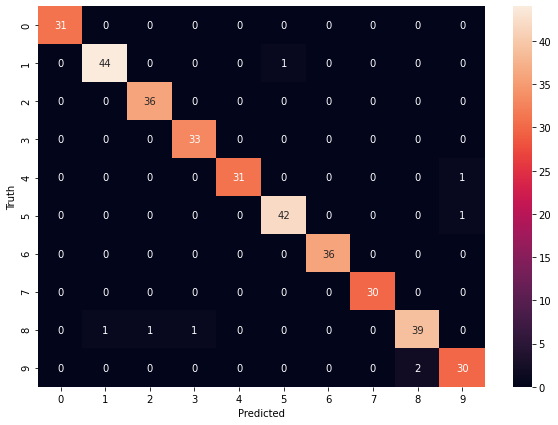

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')